<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

In [126]:
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings('ignore')

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Lab</font></h1>
<hr>
<font size = 5> Clusterização Hierárquica</font>

# Recordando a Teoria

Reveja aqui o processo complete o Clusterização Hierárquica.

```
Importar os dados
df= pd.read_csv("..../ .csv")

1.   # Definir os dados (culunas) do modelo
X = df[...]

2.   # Normalização e outras preparações dos dados
from sklearn.preprocessing import normalize
X = normalize(X)

3.   # Avalia o número de agrupamentos desejado
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for n_clusters in range(2,8):
  clf = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
  clf.fit_predict(X)
  labels = clf.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ',silhouette_score(X, labels, metric='euclidean'))

4.   ## Declarar e treinar o modelo - considerando o número de cluster apontado no item anterior
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
clf.fit(X)

5.   # Resultados
labels = clf.labels_
print(labels)

6.   # Associando os dados
df['cluster'] = labels
print(df.head())
```

# Exemplo.  **E-commerce**

Este é um conjunto de dados transacionais que contém todas as transações ocorridas entre 01/12/2010 e 09/12/2011 para uma loja virtual no Reino Unido. A empresa vende principalmente presentes únicos para todas as ocasiões. Muitos clientes da empresa são atacadistas.

*   **CustomerID:** número inteiro de 5 dígitos atribuído exclusivamente a cada cliente.
*   **Recency**: Número de dias desde a última compra.
*   **Frequency**: Número de compras realizadas pelo cliente
*   **Amount**: Valor total das compras (receita contribuída)

In [127]:
import pandas as pd
df=pd.read_csv("http://www.orlandoalbarracin.com.br/phyton/retail_dataset_.csv", index_col=[0])
df.head()

,CustomerID,Amount,Frequency,Recency
0,12347.0,4310.00,182,1
1,12348.0,1797.24,31,74
2,12349.0,1757.55,73,18
3,12350.0,334.40,17,309
4,12352.0,1545.41,95,35


In [128]:
# Explore a base de dados!


In [129]:
X = df[['Amount', 'Frequency', 'Recency']]
X

,Amount,Frequency,Recency
0,4310.00,182,1
1,1797.24,31,74
2,1757.55,73,18
3,334.40,17,309
4,1545.41,95,35
...,...,...,...
4317,180.60,10,277
4318,80.82,7,180
4319,176.60,13,7
4320,2094.88,756,3


In [130]:
#Normalizando os dados

from sklearn.preprocessing import normalize
X = normalize(X)

In [131]:
# Avaliando o número de agrupamentos usando a silhouette

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for n_clusters in range(2,8):
  clf = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
  clf.fit_predict(X)
  labels = clf.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', silhouette_score(X, labels, metric='euclidean'))


Média do valor de Silhouette para  2  clusters:  0.7382121184741594
Média do valor de Silhouette para  3  clusters:  0.6525249251163979
Média do valor de Silhouette para  4  clusters:  0.5450074113526773
Média do valor de Silhouette para  5  clusters:  0.545881302504618
Média do valor de Silhouette para  6  clusters:  0.5367858999838558
Média do valor de Silhouette para  7  clusters:  0.5395401112134732


In [132]:
#Declarando e treinando o modelo. Associando os clusters

clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clf.fit(X)
labels = clf.labels_

df['cluster'] = labels
df.head()

,CustomerID,Amount,Frequency,Recency,cluster
0,12347.0,4310.00,182,1,1
1,12348.0,1797.24,31,74,1
2,12349.0,1757.55,73,18,1
3,12350.0,334.40,17,309,0
4,12352.0,1545.41,95,35,1


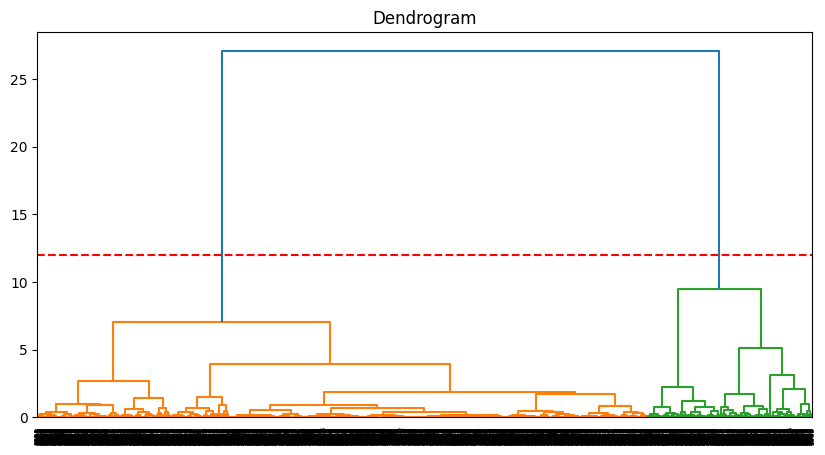

In [133]:
# Fazendo dendograma

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Dendrogram")
plt.xticks(rotation=90)

dendrogram = shc.dendrogram(shc.linkage(X, method='ward')) # cuidado com o nome
plt.axhline(y=12, color='r', linestyle='--')

plt.show()


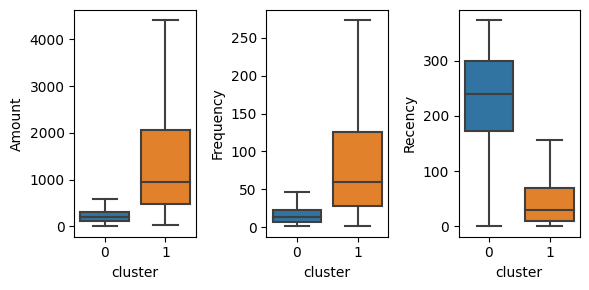

In [134]:
# Analisando os grupos!

import seaborn as sns

f, axis = plt.subplots(1,3, figsize=(6,3))
sns.boxplot(x='cluster', y='Amount', data=df, showfliers = False,ax=axis[0])
sns.boxplot(x='cluster', y='Frequency', data=df, showfliers = False,ax=axis[1])
sns.boxplot(x='cluster', y='Recency', data=df, showfliers = False,ax=axis[2])

plt.tight_layout()

Note que o Cluster 1 se refere aos clientes com maior renda e que fazem compras com maior frequência.

# Exercício: **Airbnb NYC 2019**



Neste data set você encontra dados do Airbnb de NYC de 2019. Explore os dados e em seguida faça uma clusterização dos imóveis com base nos atributos numérico e o tipo de apartamento (`room_type`).

Durante a aula vamos usar a versão reduzida da base de dados:
*   https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019_TIC.csv

Para responder o questionário use:
*   https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019.csv

## Exercício. Acesse e Explore os dados

In [135]:
# Seu Código
import pandas as pd
df=pd.read_csv("https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019_TIC.csv")
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0
1,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,162,2019-06-28,1.46,2,137
2,76761,Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm,118971,Evelyn,Brooklyn,South Slope,40.66552,-73.99019,Entire home/apt,169,2,398,2019-06-28,3.97,3,182


In [136]:
# shape dataset (before drop)
print(f'shape dataset rows: {df.shape[0]} and columns: {df.shape[1]}')

shape dataset rows: 804 and columns: 16


##  Verifique a presença de Nulos
Verifique se existem dados nulas e, se houver, escolha eliminar esses casos.

DICA: `isna()`, `dropna()`

In [137]:
# check for missing values.
df.isna().sum()

id                                  0
name                                1
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       176
reviews_per_month                 176
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [138]:
# drop line with missing values
df = df.dropna()

In [139]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [140]:
print(f'shape dataset after drop NaN, rows: {df.shape[0]} and columns: {df.shape[1]}')

shape dataset after drop NaN, rows: 628 and columns: 16


In [141]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [142]:
df['room_type'].value_counts(normalize=True).map('{:.2%}'.format)

Entire home/apt    53.66%
Private room       43.95%
Shared room         2.39%
Name: room_type, dtype: object

## Faça o Hot Encode da variável `room_type`

Verifique os valores de `room_type` e faça o *Hot Encode*. Você pode  mudar o nome dos atributos ao final usando `rename`.

DICAS:
```
# Hot encode
dummies = pd.get_dummies(df.<atributo>,prefix='<prefix>')
df = pd.concat([df, dummies],axis=1)

# Rename Columns
df.rename(columns={'antes1':'depois1', 'antes2':'depois'},inplace=True)
```

In [143]:
# Hot encode
dummies = pd.get_dummies(df.room_type,prefix='room_type')

# list columns from dummies(HE)
lcols = list(dummies.columns)

# concatenate
df = pd.concat([df, dummies],axis=1)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0,1,0,0
1,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,162,2019-06-28,1.46,2,137,1,0,0
2,76761,Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm,118971,Evelyn,Brooklyn,South Slope,40.66552,-73.99019,Entire home/apt,169,2,398,2019-06-28,3.97,3,182,1,0,0


In [144]:
lcols

['room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room']

In [145]:
# Rename Columns
for lcol in lcols:
    newcol = lcol.replace('room_type', 'rt')
    df.rename(columns={f'{lcol}':f'{newcol}'},inplace=True)

In [146]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'rt_Entire home/apt',
 'rt_Private room',
 'rt_Shared room']

In [147]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
rt_Entire home/apt                  uint8
rt_Private room                     uint8
rt_Shared room                      uint8
dtype: object

In [148]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rt_Entire home/apt,rt_Private room,rt_Shared room
0,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0,1,0,0
1,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,162,2019-06-28,1.46,2,137,1,0,0
2,76761,Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm,118971,Evelyn,Brooklyn,South Slope,40.66552,-73.99019,Entire home/apt,169,2,398,2019-06-28,3.97,3,182,1,0,0


## Defina a entrada `X` selecionando as variáveis de interesse

Considere somente as variáveis numéricas e o *hot encode* de `room_type`

In [149]:
X = df.select_dtypes(include=['float64', 'int64'])
X.dtypes


id                                  int64
host_id                             int64
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [150]:
#columns numerical variables

## Normalize os dados

Use a função `normalize` da biblioteca `sklearn.preprocessing`.

In [156]:
# normalize
scaler = Normalizer() 
scaler.fit(X)

# fit transform
X_norm = scaler.fit_transform(X)


In [158]:
# dataframe from X normalized.
data_normalized = pd.DataFrame(X_norm, columns=X.columns)
data_normalized.head(3)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.254694,0.967018,0.000496,-0.000901,0.001218,0.000061,0.002046,0.000019,0.000012,0.000000
1,0.276309,0.961064,0.000445,-0.000809,0.001369,0.000985,0.001774,0.000016,0.000022,0.001500
2,0.542151,0.840274,0.000287,-0.000523,0.001194,0.000014,0.002811,0.000028,0.000021,0.001285


## Selecione o número de Clusters

Empregando a Clusterização Hierárquica Aglomerativa, com distência Euclidiana e `linkage='ward'` determine o número de clusters usando a métrica `Siclhouette`.




In [160]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for n_clusters in range(2,8):
  clf = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
  clf.fit_predict(data_normalized)
  labels = clf.labels_
  print('average value for - Silhouette ...:', n_clusters , ' clusters: ', silhouette_score(data_normalized, labels, metric='euclidean'))


average value for - Silhouette ...: 2  clusters:  0.6885850085468022
average value for - Silhouette ...: 3  clusters:  0.6681898896960717
average value for - Silhouette ...: 4  clusters:  0.6465791830372666
average value for - Silhouette ...: 5  clusters:  0.6485463213733534
average value for - Silhouette ...: 6  clusters:  0.6417397887521722
average value for - Silhouette ...: 7  clusters:  0.655573123071331


## Clusterize os dados

Exiba os rótulos (labels) gerados. Adicione então os labels ao dataframe original em uma nova coluna `cluster`.

In [164]:
from sklearn.cluster import AgglomerativeClustering

# Selection 2 Cluster.

## define model
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

## trainning
clf.fit(data_normalized)

# results
labels = clf.labels_
print(labels)

# associating the data
df['cluster'] = labels
df.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rt_Entire home/apt,rt_Private room,rt_Shared room,cluster
0,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0,1,0,0,0
1,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,162,2019-06-28,1.46,2,137,1,0,0,0
2,76761,Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm,118971,Evelyn,Brooklyn,South Slope,40.66552,-73.99019,Entire home/apt,169,2,398,2019-06-28,3.97,3,182,1,0,0,0
3,135465,Garden apartment close to Manhattan,663879,Christopher,Brooklyn,Fort Greene,40.68626,-73.97598,Entire home/apt,170,3,86,2019-06-20,0.91,2,286,1,0,0,0
4,169002,Modern Space in Charming Pre-war,805344,Alec,Manhattan,Harlem,40.82411,-73.94934,Private room,65,2,41,2019-06-16,0.43,2,59,0,1,0,0


##  Exiba o Dendograma

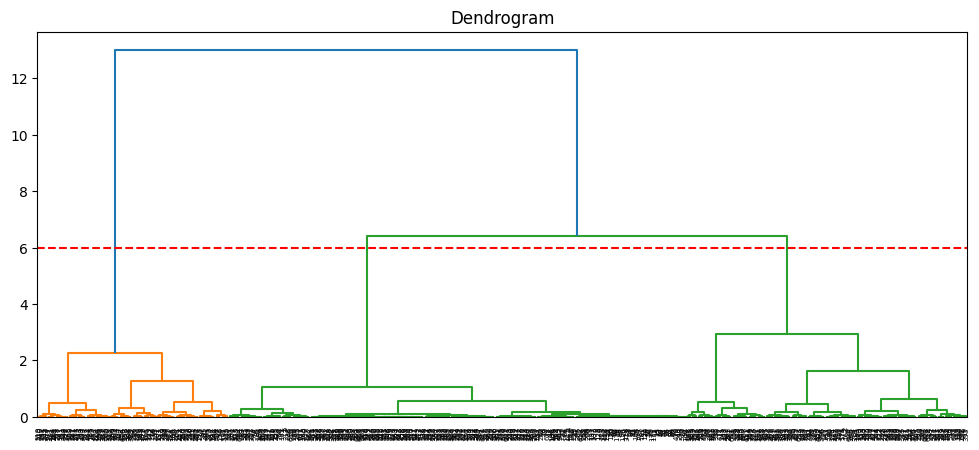

In [165]:
# Seu código
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.title("Dendrogram")
plt.xticks(rotation=90)

dendrogram = shc.dendrogram(shc.linkage(data_normalized, method='ward')) # cuidado com o nome
plt.axhline(y=6, color='r', linestyle='--')

plt.show()


## Caracterizando os grupos (**RESOLVIDO**)

Verificando os valores médios de cada grupo.

In [169]:
data_normalized.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

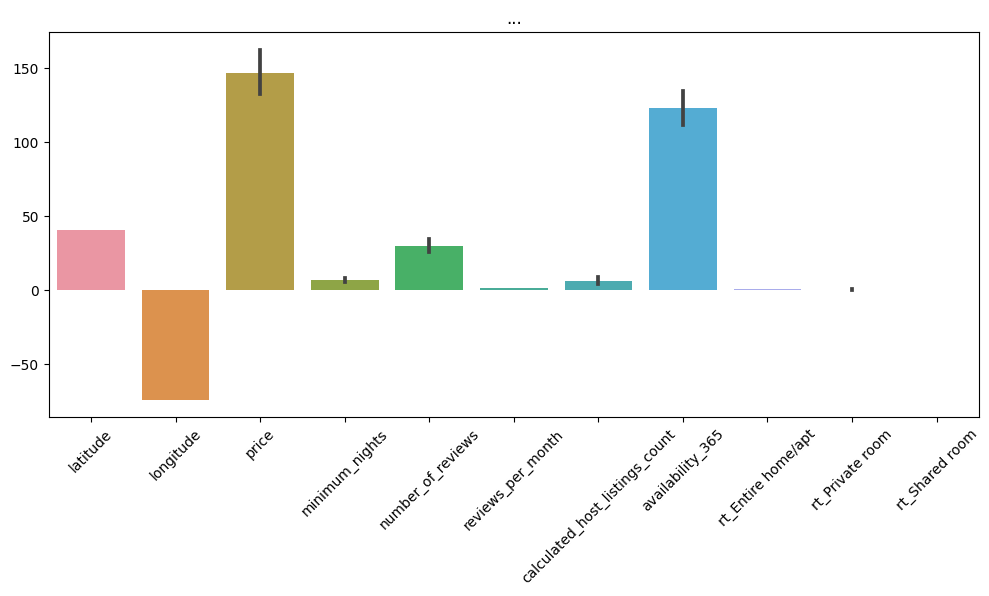

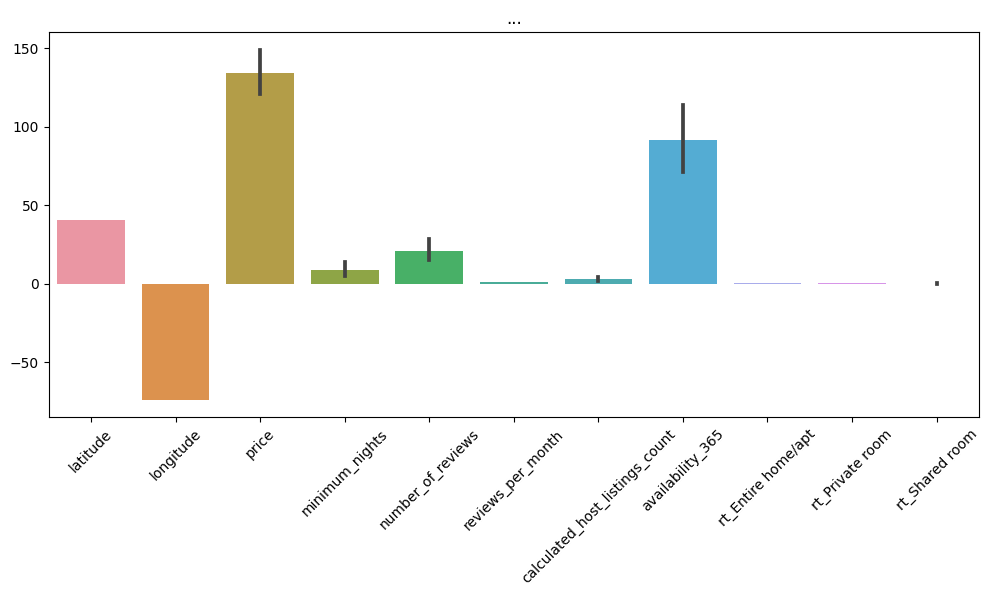

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

g = df[['latitude', 'longitude','price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'rt_Entire home/apt', 'rt_Private room', 'rt_Shared room',
        'cluster']]

f = plt.figure(figsize=(12,5))
sns.barplot(data=g[g.cluster==0].drop(columns='cluster'))
plt.xticks(rotation=45)
plt.title('...')
plt.show()

f = plt.figure(figsize=(12,5))
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'))
plt.xticks(rotation=45)
plt.title('...')
plt.show()